<a href="https://colab.research.google.com/github/marilena238/datastories_for_emme/blob/main/Homework_10_Marilena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download el_core_news_sm

2023-06-19 15:02:37.476624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 15:02:39.559887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 33.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [4]:
from datetime import datetime
import pandas as pd

In [5]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [6]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [8]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import spacy

In [10]:
nlp = spacy.load('el_core_news_sm')

In [11]:
news_bomb_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv")

In [12]:
len(news_bomb_df)

75

In [13]:
news_bomb_df.head(1)

,site,url,section,title,date,author,full_text
0,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436931...,ΠΟΛΙΤΙΚΗ,«Άλλο να είσαι σε σπίτι κι άλλο στο λιμάνι εκτ...,2023-06-12T19:47:11+03:00,Newsbomb,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...


In [14]:
short_news_bomb_df =news_bomb_df[['date','full_text' ]]
short_news_bomb_df = short_news_bomb_df.rename(columns={'full_text': 'text'} )

In [15]:
short_news_bomb_df.head()

,date,text
0,2023-06-12T19:47:11+03:00,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...
1,2023-06-12T19:37:46+03:00,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...
2,2023-06-12T18:31:54+03:00,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...
3,2023-06-12T17:45:23+03:00,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...
4,2023-06-12T17:20:24+03:00,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...


In [16]:
short_news_bomb_df.dtypes

date    object
text    object
dtype: object

In [17]:
short_news_bomb_df['date'] = pd.to_datetime(short_news_bomb_df['date'])

In [18]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [19]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [20]:
matrix = vec.fit_transform(short_news_bomb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
wordcount_df.shape

(75, 13161)

In [22]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [25]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [26]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
wordcount_df[trust_words].sum(axis=1)

0      7
1      0
2      1
3      4
4      5
      ..
70     5
71     5
72     6
73    17
74    12
Length: 75, dtype: int64

In [29]:
short_news_bomb_df.head(3)

,date,text
0,2023-06-12 19:47:11+03:00,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...
1,2023-06-12 19:37:46+03:00,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...
2,2023-06-12 18:31:54+03:00,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...


In [30]:
short_news_bomb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_news_bomb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_news_bomb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_news_bomb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_news_bomb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_news_bomb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_news_bomb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_news_bomb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_news_bomb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_news_bomb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [31]:
short_news_bomb_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-06-12 19:47:11+03:00,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...,3,11,2,4,3,7,4,1,7,3
1,2023-06-12 19:37:46+03:00,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...,0,0,0,2,0,0,1,0,0,0
2,2023-06-12 18:31:54+03:00,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...,1,5,2,0,3,1,5,1,5,2
3,2023-06-12 17:45:23+03:00,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...,2,8,4,1,1,4,3,1,6,0
4,2023-06-12 17:20:24+03:00,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...,0,6,1,0,2,5,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-06-10 11:37:27+03:00,Newsbomb Η Ζωή Κωνσταντοπούλου εξήγησε πως εκε...,7,8,5,7,4,5,1,6,10,4
71,2023-06-10 11:24:09+03:00,Newsbomb Εκλογές 2023: Σκληρή απάντηση στον ΣΥ...,7,5,0,4,0,5,5,2,7,1
72,2023-06-10 11:09:18+03:00,"Newsbomb Η υποψήφια βουλευτής του ΣΥΡΙΖΑ, Αθην...",0,6,1,0,0,6,2,0,1,0
73,2023-06-10 10:57:11+03:00,Newsbomb Τι έλεγε η Αθηνά Λινού στο παρελθόν γ...,12,24,4,6,2,17,13,3,17,3


In [32]:
short_news_bomb_df.reset_index(inplace=True)
short_news_bomb_df.set_index('date', inplace=True)
short_news_bomb_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-06-12 19:47:11+03:00,0,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...,3,11,2,4,3,7,4,1,7,3
2023-06-12 19:37:46+03:00,1,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...,0,0,0,2,0,0,1,0,0,0
2023-06-12 18:31:54+03:00,2,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...,1,5,2,0,3,1,5,1,5,2
2023-06-12 17:45:23+03:00,3,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...,2,8,4,1,1,4,3,1,6,0
2023-06-12 17:20:24+03:00,4,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...,0,6,1,0,2,5,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-10 11:37:27+03:00,70,Newsbomb Η Ζωή Κωνσταντοπούλου εξήγησε πως εκε...,7,8,5,7,4,5,1,6,10,4
2023-06-10 11:24:09+03:00,71,Newsbomb Εκλογές 2023: Σκληρή απάντηση στον ΣΥ...,7,5,0,4,0,5,5,2,7,1
2023-06-10 11:09:18+03:00,72,"Newsbomb Η υποψήφια βουλευτής του ΣΥΡΙΖΑ, Αθην...",0,6,1,0,0,6,2,0,1,0


<Axes: xlabel='date'>

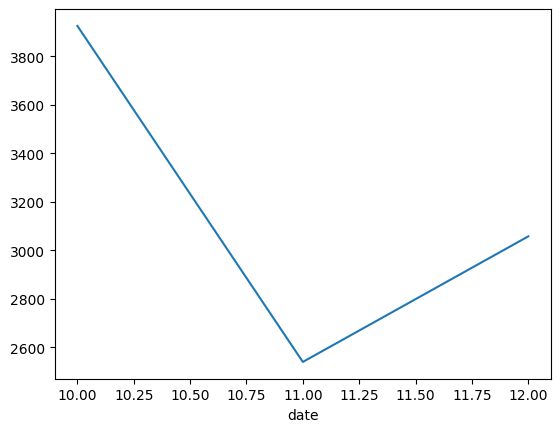

In [33]:
short_news_bomb_df['text'].str.len().groupby(by=short_news_bomb_df.index.day).mean().plot()

<Axes: xlabel='date'>

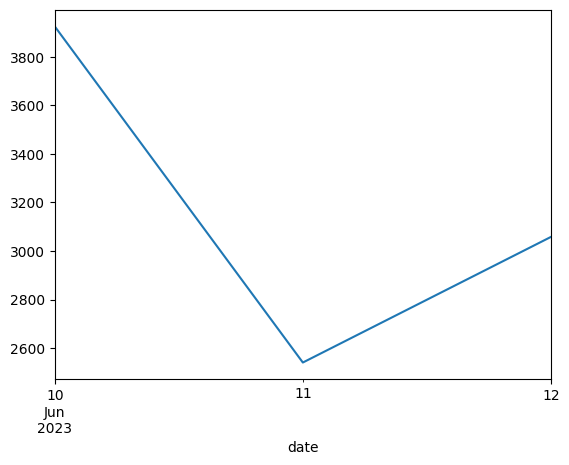

In [34]:
short_news_bomb_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

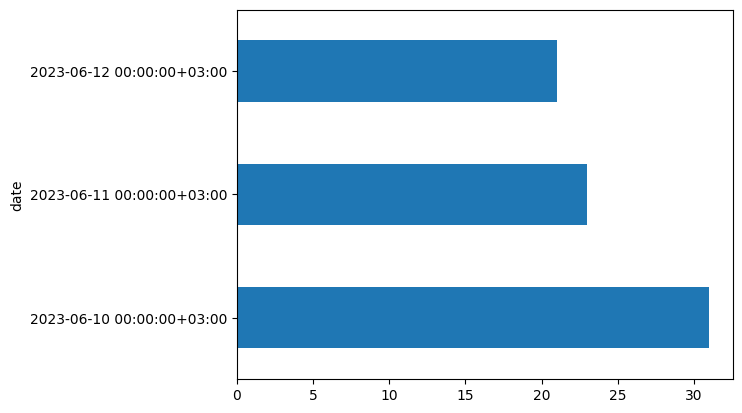

In [35]:
short_news_bomb_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='date'>

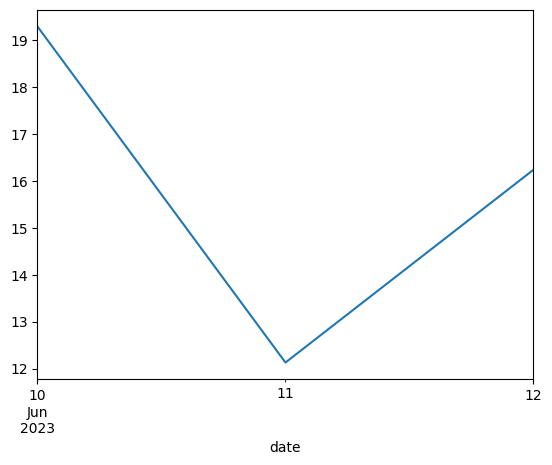

In [36]:
short_news_bomb_df['positive'].resample('D').mean().plot()

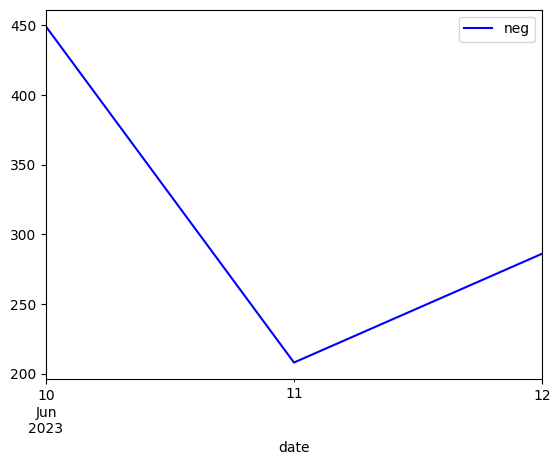

In [37]:
short_news_bomb_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

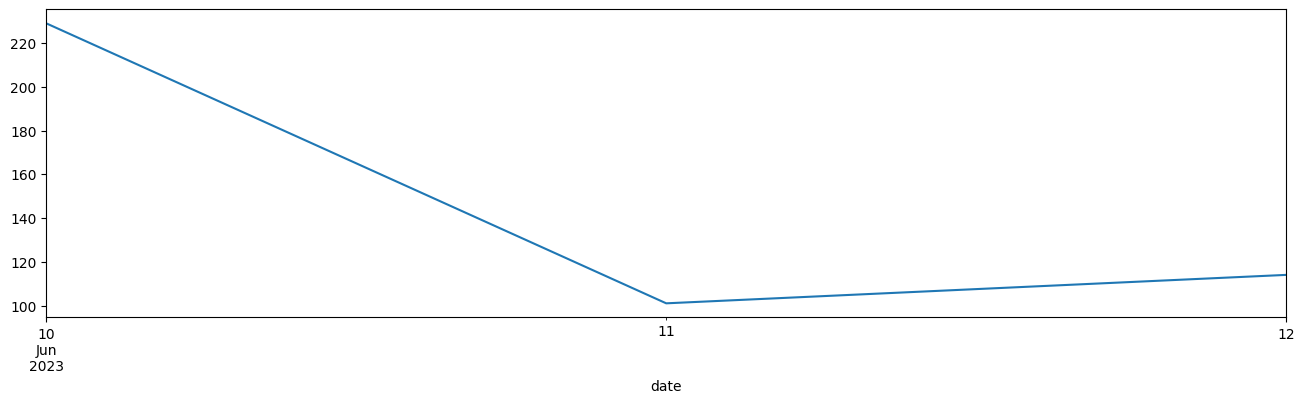

In [38]:
short_news_bomb_df['anger'].resample('D').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

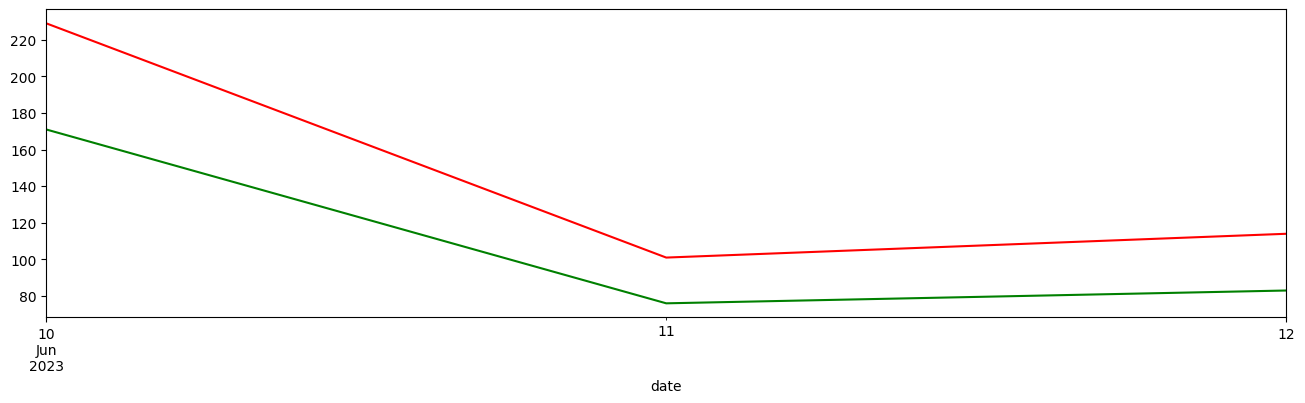

In [39]:
ax = short_news_bomb_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_news_bomb_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

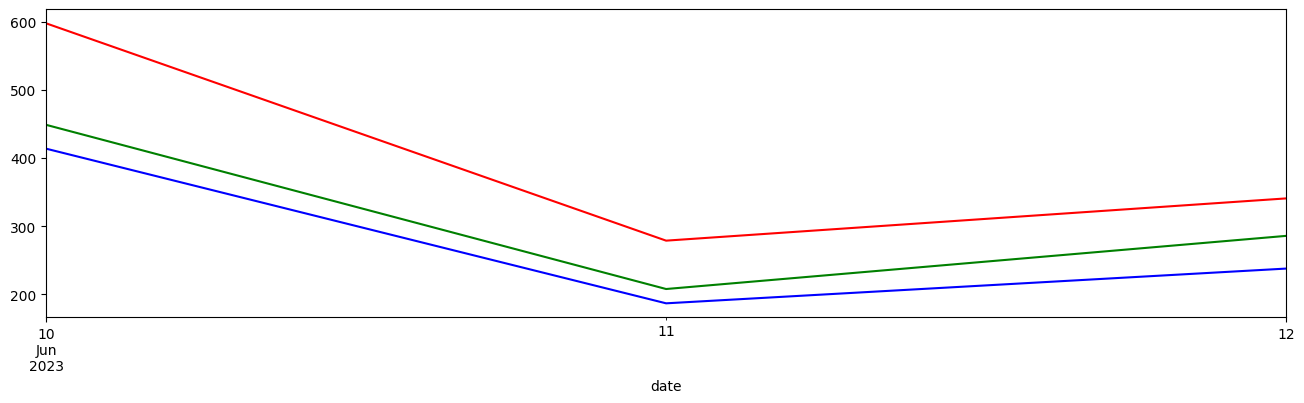

In [40]:
ax = short_news_bomb_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_news_bomb_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_news_bomb_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [43]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [44]:
plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

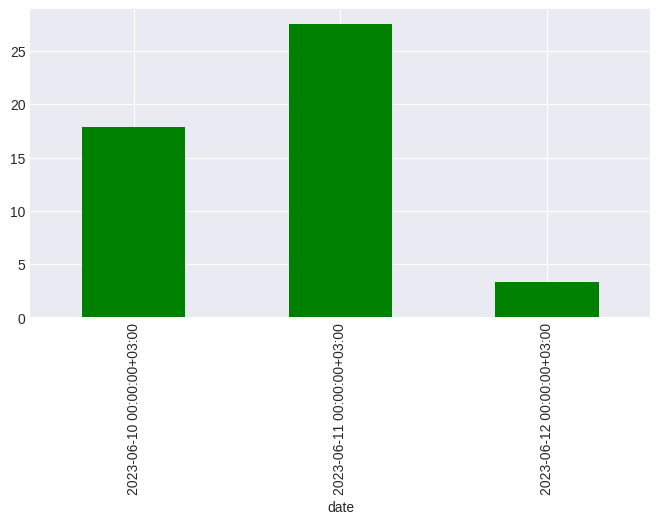

In [45]:
short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_news_bomb_df.positive*100//short_news_bomb_df[['positive','negative']].sum(
        axis=1) - short_news_bomb_df.negative*100//short_news_bomb_df[['positive','negative']].sum(axis=1)

short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [46]:
short_news_bomb_df[(short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_news_bomb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-06-12 09:14:17+03:00,18,1,4,-60.0
2023-06-11 12:24:40+03:00,35,1,0,100.0
2023-06-11 12:03:58+03:00,36,2,0,100.0


In [48]:
news_bomb_df.loc[[18,35,36], ['url','title', 'full_text']]

,url,title,full_text
18,https://www.newsbomb.gr/politikh/story/1436687...,«Αρπάχτηκαν» Βούλτεψη και Μαμουλάκης για τη Ρο...,Newsbomb Το θέμα της Ροδόπης και της ψήφου των...
35,https://www.newsbomb.gr/politikh/story/1436461...,Εκλογές 2023: Συνεδριάζει στις 12 Ιουνίου η Δι...,Newsbomb Εκλογές 2023: Η συνεδρίαση της Διακομ...
36,https://www.newsbomb.gr/politikh/story/1436453...,Εκλογές 2023: Δεκάλεπτο τηλεοπτικό σποτ του ΣΥ...,Newsbomb Αποτελείται από τις προγραμματικές θέ...
